In [1]:
# INF 2178 Technical Assignment 2
# Jinhang Luo (1005124777)
# March 9th, 2024

In [1]:
# Loading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Loading and read the dataset
data = pd.read_excel('INF2178_A2_data.xlsx')
# Check the data
data.info()

Note: you may need to restart the kernel to use updated packages.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   _id          1063 non-null   int64 
 1   LOC_ID       1063 non-null   int64 
 2   LOC_NAME     1063 non-null   object
 3   AUSPICE      1063 non-null   object
 4   ADDRESS      1063 non-null   object
 5   PCODE        1063 non-null   object
 6   ward         1063 non-null   int64 
 7   bldg_type    1063 non-null   object
 8   BLDGNAME     715 non-null    object
 9   IGSPACE      1063 non-null   int64 
 10  TGSPACE      1063 non-null   int64 
 11  PGSPACE      1063 non-null   int64 
 12  KGSPACE      1063 non-null   int64 
 13  SGSPACE      1063 non-null   int64 
 14  TOTSPACE     1063 non-null   int64 
 15  subsidy      1063 non-null   object
 16  cwelcc_flag  1063 non-null   object
dtypes: int64(9), object(8)
memory usage: 141.3+

In [2]:
# Cleanning process
# Dropping columns 
columns_to_drop = ['_id','LOC_ID','LOC_NAME','ADDRESS', 'PCODE', 'ward','BLDGNAME','subsidy','cwelcc_flag']
data_new = data.drop(columns=columns_to_drop)

# Replace column names
data_new.columns = ['Operating_Auspice', 'Type_of_building', 'Child_care_spaces_Infants','Child_care_spaces_Toddlers',
                    'Child_care_spaces_preschooler)','Child_care_spaces_kindergarten','Child_care_spaces_Grade1_up)',
                    'Total_child_care_spaces']
# Check the cleaned new data(No missing data in the cleaned data)
data_new.head(10)

,Operating_Auspice,Type_of_building,Child_care_spaces_Infants,Child_care_spaces_Toddlers,Child_care_spaces_preschooler),Child_care_spaces_kindergarten,Child_care_spaces_Grade1_up),Total_child_care_spaces
0,Non Profit Agency,Public Elementary School,0,20,32,52,60,164
1,Non Profit Agency,Public Elementary School,0,0,12,26,45,83
2,Non Profit Agency,Catholic Elementary School,0,10,16,26,50,102
3,Non Profit Agency,Other,10,15,40,0,0,65
4,Non Profit Agency,High Rise Apartment,0,10,16,0,0,26
5,Non Profit Agency,Community College/University,10,20,32,0,0,62
6,Non Profit Agency,Public High School,10,15,24,0,0,49
7,Commercial Agency,High Rise Apartment,0,0,16,0,30,46
8,Non Profit Agency,Public Elementary School,0,0,21,0,30,51
9,Non Profit Agency,Public Elementary School,0,0,24,39,90,153


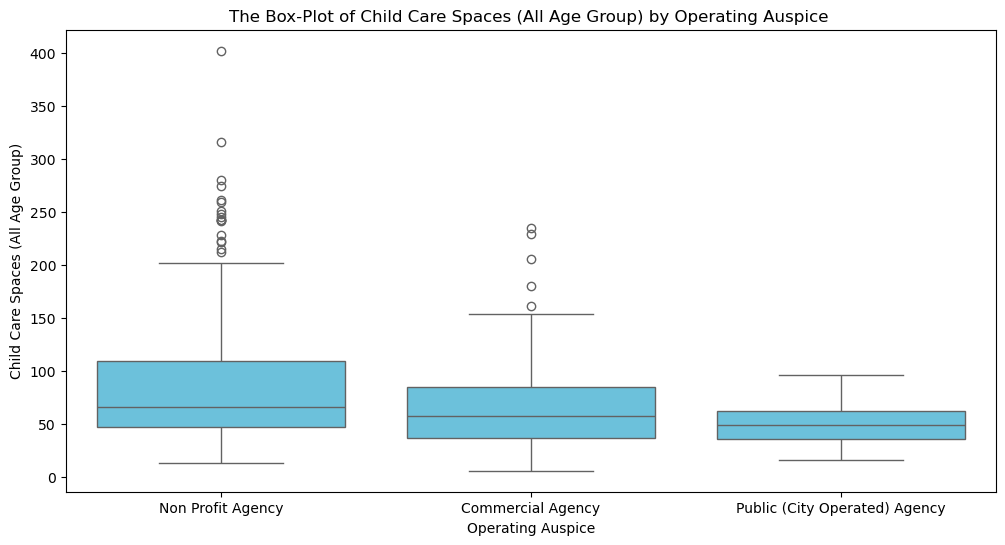

In [3]:
# Generate a boxplot to detect the differences between different Operating Auspice
plt.figure(figsize=(12, 6))  
ax = sns.boxplot(x='Operating_Auspice', y='Total_child_care_spaces', data=data_new, color='#5acbed')
ax.set_title('The Box-Plot of Child Care Spaces (All Age Group) by Operating Auspice ')
ax.set_xlabel('Operating Auspice')
ax.set_ylabel('Child Care Spaces (All Age Group)')
plt.show()

In [4]:
# Descriptive statistics
# Print description of the data
data_new.describe()

,Child_care_spaces_Infants,Child_care_spaces_Toddlers,Child_care_spaces_preschooler),Child_care_spaces_kindergarten,Child_care_spaces_Grade1_up),Total_child_care_spaces
count,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000
mean,3.896519,11.600188,24.258702,14.257761,21.661336,75.674506
std,6.091782,12.088152,18.577416,20.493290,30.423503,47.816518
min,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,43.000000
50%,0.000000,10.000000,24.000000,0.000000,0.000000,62.000000
75%,10.000000,15.000000,32.000000,26.000000,30.000000,97.000000
max,30.000000,90.000000,144.000000,130.000000,285.000000,402.000000


In [5]:
# Ordinary Least Squares Model
# One-way ANOVA (Total_child_care_spaces & Operating_Auspice)
one_way_model = ols('Total_child_care_spaces ~ C(Operating_Auspice)', data=data_new).fit()
anova_table = sm.stats.anova_lm(one_way_model, typ=2)
anova_table

# Print ANOVA table
res = stat()
res.anova_stat(df=data_new, res_var='Total_child_care_spaces', anova_model= 'Total_child_care_spaces ~ C(Operating_Auspice)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Operating_Auspice),2.0,9.611211e+04,48056.057145,21.843051,5.057716e-10
Residual,1060.0,2.332065e+06,2200.061571,NaN,NaN


In [6]:
# Perform the post-hoc Tukey HSD test
tukey_hsd = pairwise_tukeyhsd(endog=data_new['Total_child_care_spaces'], groups=data_new['Operating_Auspice'], alpha=0.05)

# Show the summary of the Tukey HSD test
tukey_hsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Commercial Agency,Non Profit Agency,17.1194,0.0,9.7037,24.5351,True
Commercial Agency,Public (City Operated) Agency,-17.2152,0.0779,-35.8832,1.4528,False
Non Profit Agency,Public (City Operated) Agency,-34.3346,0.0,-52.4448,-16.2244,True


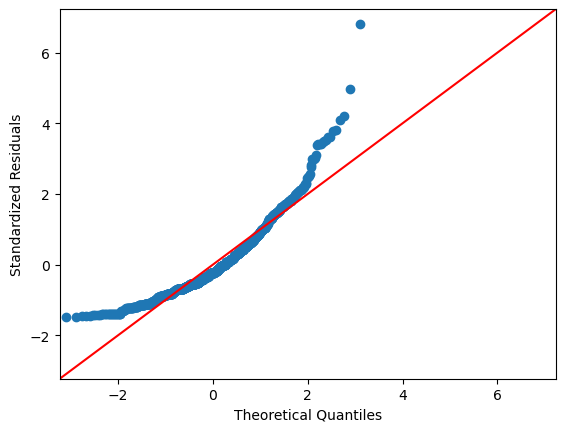

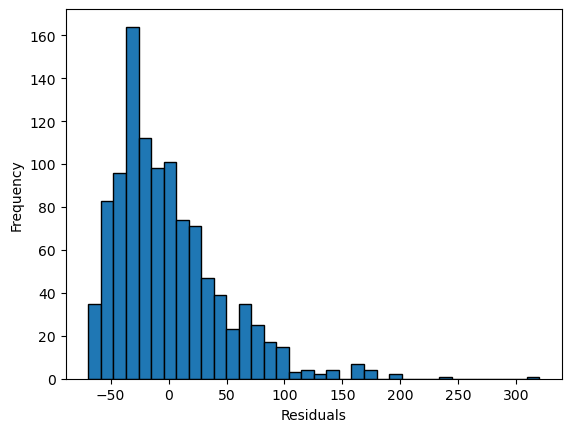

In [7]:
# Checking model diagnostics
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [8]:
# Assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(one_way_model.resid)
print(w,pvalue)

0.901775598526001 1.4964898448030214e-25


In [9]:
# Assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
res.levene(df=data_new, res_var='Total_child_care_spaces', xfac_var='Operating_Auspice')
res.levene_summary

,Parameter,Value
0,Test statistics (W),17.9271
1,Degrees of freedom (Df),2.0000
2,p value,0.0000


In [10]:
# Using Box-Cox Transformation
# Ordinary Least Squares Model
# One-way ANOVA (Total_child_care_spaces & Operating_Auspice)
# Now apply the Box-Cox transformation
transformed_data, best_lambda = stats.boxcox(data_new['Total_child_care_spaces'])
# Add the transformed data as a new column to the dataframe
data_new['Transformed_Total_child_care_spaces'] = transformed_data

transformed_one_way_model = ols('Transformed_Total_child_care_spaces ~ C(Operating_Auspice)', data=data_new).fit()
transformed_anova_table = sm.stats.anova_lm(transformed_one_way_model, typ=2)
transformed_anova_table

# Print ANOVA table
res1 = stat()
res1.anova_stat(df=data_new, res_var='Transformed_Total_child_care_spaces', anova_model= 'Transformed_Total_child_care_spaces ~ C(Operating_Auspice)')
res1.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Operating_Auspice),2.0,45.405376,22.702688,19.365805,5.489722e-09
Residual,1060.0,1242.646455,1.172308,NaN,NaN


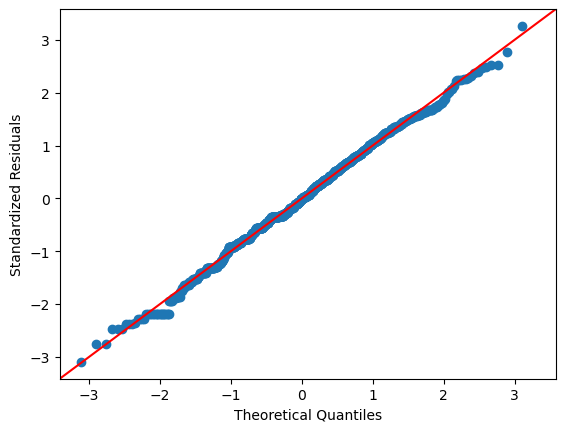

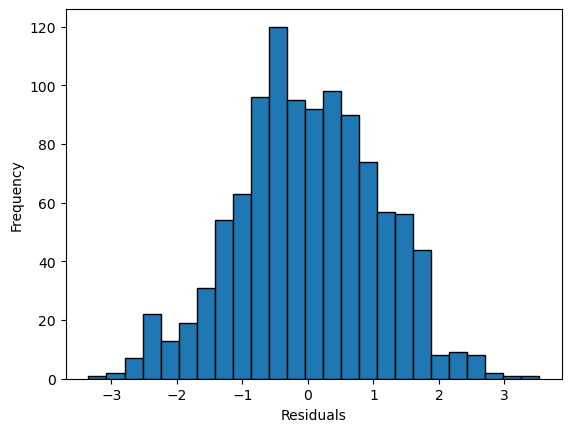

In [11]:
# Checking model diagnostics
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res1.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res1.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [12]:
# Assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(transformed_one_way_model.resid)
print(w,pvalue)

0.9970179200172424 0.04397028312087059


In [13]:
# Assumption 2: variances are homoegenous: Bartlett's test when the sample is normally distributed
groups = data_new.groupby('Operating_Auspice')['Transformed_Total_child_care_spaces'].apply(list)
w1, pvalue1 = stats.bartlett(*groups)
print(w1, pvalue1)

res1 = stat()
res1.bartlett(df=data_new, res_var='Transformed_Total_child_care_spaces', xfac_var='Operating_Auspice')
res1.bartlett_summary

17.264797654774036 0.0001782365731618877


,Parameter,Value
0,Test statistics (T),17.2648
1,Degrees of freedom (Df),2.0000
2,p value,0.0002


In [14]:
# Perform the post-hoc Tukey HSD test
tukey_hsd = pairwise_tukeyhsd(endog=data_new['Transformed_Total_child_care_spaces'], groups=data_new['Operating_Auspice'], alpha=0.05)

# Show the summary of the Tukey HSD test
tukey_hsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Commercial Agency,Non Profit Agency,0.3667,0.0,0.1956,0.5379,True
Commercial Agency,Public (City Operated) Agency,-0.396,0.0793,-0.8269,0.0349,False
Non Profit Agency,Public (City Operated) Agency,-0.7627,0.0001,-1.1808,-0.3447,True


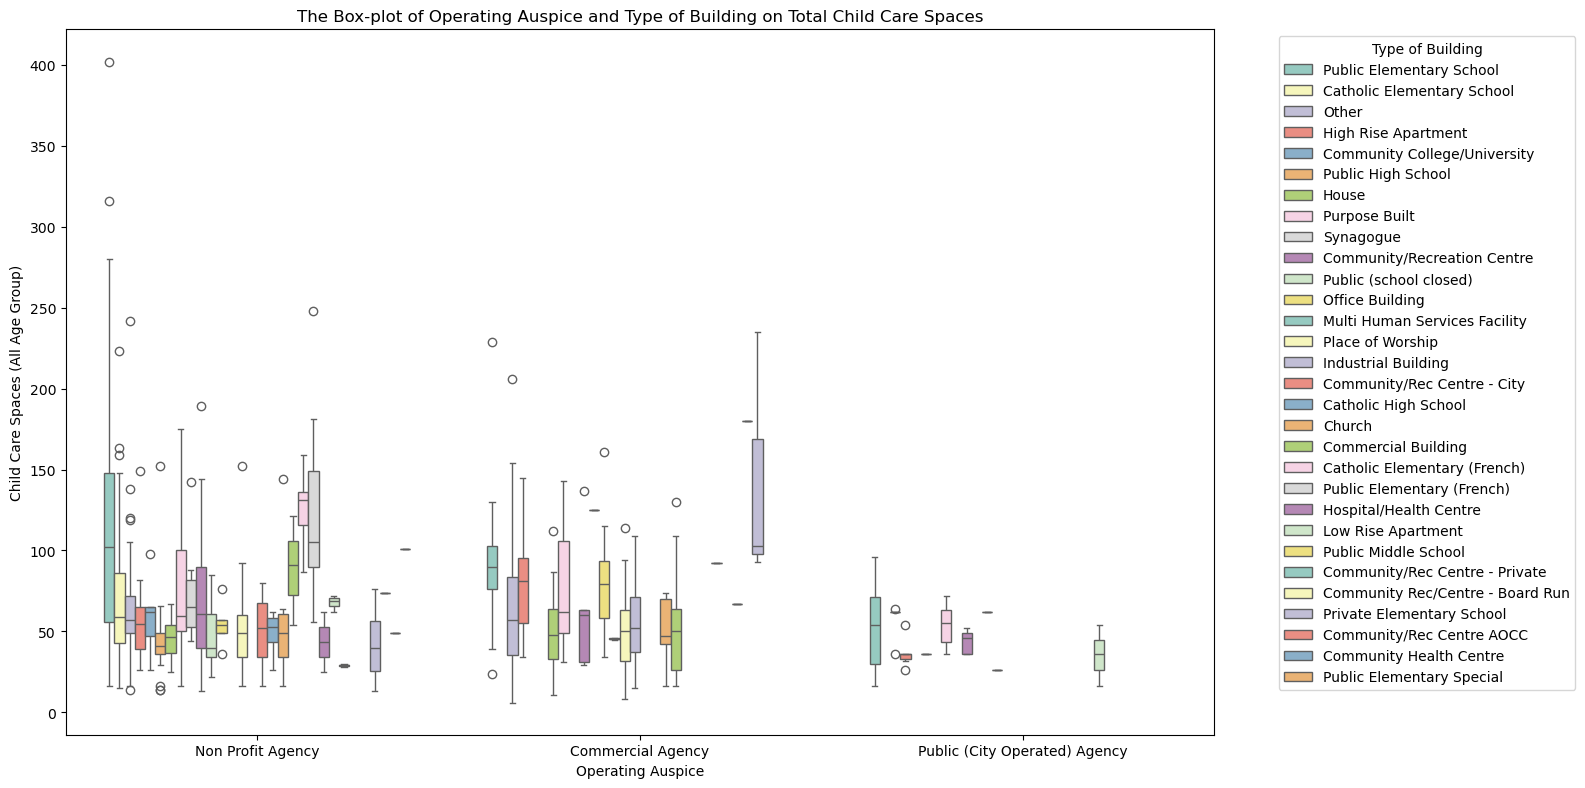

In [15]:
# Generate a boxplot for Operating Auspice and Type of Building on Total Child Care Spaces
plt.figure(figsize=(16, 8 )) 
ax = sns.boxplot(x='Operating_Auspice', y='Total_child_care_spaces', hue='Type_of_building', data=data_new, palette="Set3")
plt.title('The Box-plot of Operating Auspice and Type of Building on Total Child Care Spaces')
ax.set_xlabel('Operating Auspice')
ax.set_ylabel('Child Care Spaces (All Age Group)')
plt.legend(title='Type of Building', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [19]:
# Two-way ANOVA (Building Type and Auspice on Total Spaces Available)
transformed_two_way_model = ols('Transformed_Total_child_care_spaces ~ C(Operating_Auspice) + C(Type_of_building) + C(Operating_Auspice):C(Type_of_building)', data=data_new).fit()
transformed_two_way_anova_table = sm.stats.anova_lm(transformed_two_way_model, typ=2)
transformed_two_way_anova_table


# Print Two-way ANOVA table
res2 = stat()
res2.anova_stat(df=data_new, res_var='Transformed_Total_child_care_spaces', anova_model='Transformed_Total_child_care_spaces ~ C(Operating_Auspice) + C(Type_of_building) + C(Operating_Auspice):C(Type_of_building)')
res2.anova_summary


/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 29, but rank is 5
  warnings.warn('covariance of constraints does not have full '
/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 58, but rank is 34
  warnings.warn('covariance of constraints does not have full '
/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/opt/cond

,df,sum_sq,mean_sq,F,PR(>F)
C(Operating_Auspice),2.0,-1.612468e-13,-8.062338e-14,-8.174904e-14,1.000000e+00
C(Type_of_building),29.0,9.701218e+02,3.345247e+01,3.391953e+01,4.279206e-32
C(Operating_Auspice):C(Type_of_building),58.0,1.689141e+02,2.912312e+00,2.952973e+00,5.285749e-08
Residual,1011.0,9.970789e+02,9.862304e-01,NaN,NaN


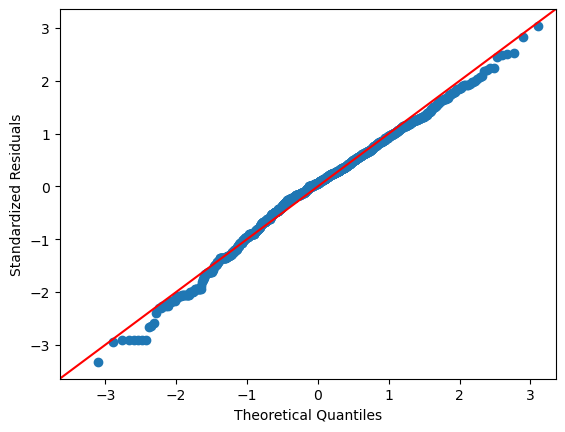

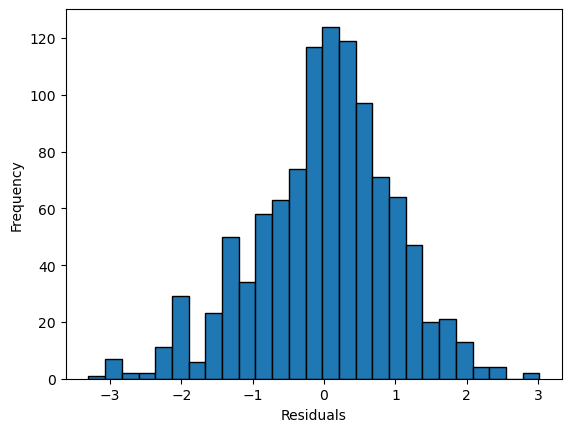

In [20]:
# Assumption 1: res2.anova_std_residuals are standardized residuals obtained from ANOVA
sm.qqplot(res2.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# Histogram
plt.hist(res2.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [21]:
# Assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(transformed_two_way_model.resid)
print(w,pvalue)

0.9907256364822388 3.045896846742835e-06


In [22]:
# Assumption 2: variances are homoegenous: Bartlett's test when the sample is normally distributed
from scipy.stats import levene
data_new['Interaction'] = data_new['Operating_Auspice'].astype(str) + "_" + data_new['Type_of_building'].astype(str)
groups = data_new.groupby('Interaction')['Transformed_Total_child_care_spaces'].apply(list)
stat, p = levene(*groups)
res.levene(df=data_new, res_var='Transformed_Total_child_care_spaces', xfac_var='Interaction')
res.levene_summary

,Parameter,Value
0,Test statistics (W),1.8925
1,Degrees of freedom (Df),51.0000
2,p value,0.0002


In [23]:
# Perform the post-hoc Tukey HSD test
tukey_hsd = pairwise_tukeyhsd(endog=data_new['Transformed_Total_child_care_spaces'], groups=data_new['Type_of_building'], alpha=0.05)

# Show the summary of the Tukey HSD test
tukey_hsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Catholic Elementary (French),Catholic Elementary School,-1.2897,0.1976,-2.7603,0.181,False
Catholic Elementary (French),Catholic High School,-1.7734,0.532,-4.14,0.5932,False
Catholic Elementary (French),Church,-1.7052,0.0522,-3.4162,0.0059,False
Catholic Elementary (French),Commercial Building,-1.7266,0.0212,-3.3485,-0.1047,True
Catholic Elementary (French),Community College/University,-1.476,0.7733,-3.6869,0.7349,False
Catholic Elementary (French),Community Health Centre,-1.6819,0.9995,-5.7184,2.3545,False
Catholic Elementary (French),Community Rec/Centre - Board Run,0.7392,1.0,-3.2973,4.7756,False
Catholic Elementary (French),Community/Rec Centre - City,-1.8087,0.1635,-3.8269,0.2095,False
Catholic Elementary (French),Community/Rec Centre - Private,-1.1384,1.0,-5.1748,2.8981,False
Catholic Elementary (French),Community/Rec Centre AOCC,-0.9608,1.0,-4.9973,3.0756,False


/opt/conda/lib/python3.11/site-packages/statsmodels/graphics/factorplots.py:113: FutureWarning: The provided callable <function mean at 0x7fa378429440> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  plot_data = data.groupby(['trace', 'x']).aggregate(func).reset_index()


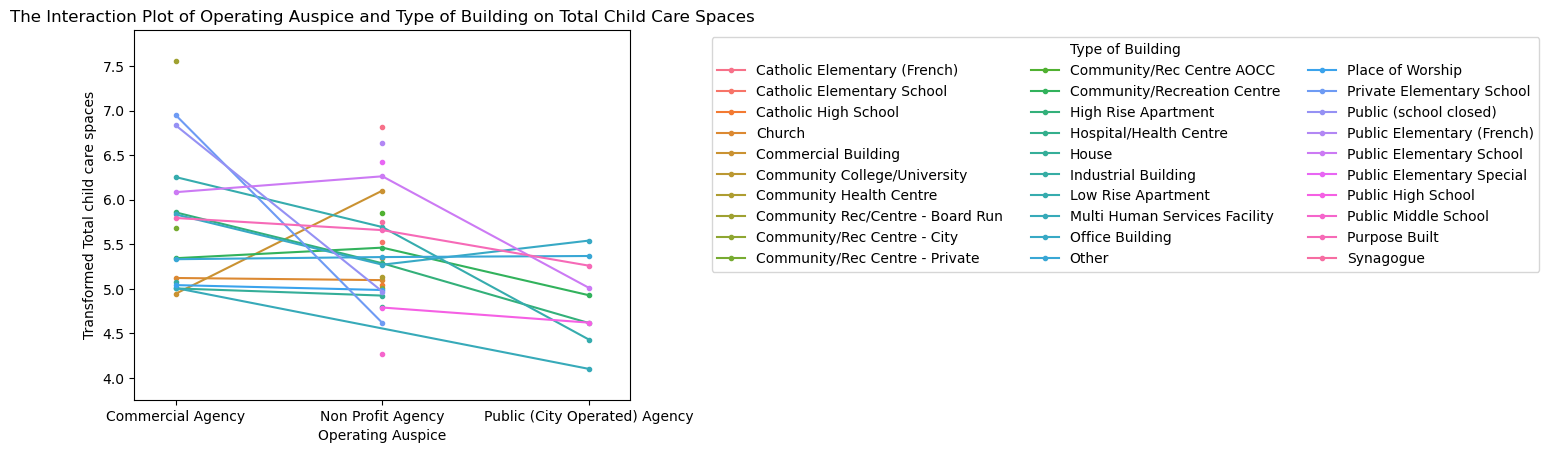

In [24]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
# Generate a interaction plot for Operating Auspice and Type of Building on Total Child Care Spaces
palette = sns.color_palette("husl", len(data_new['Type_of_building'].unique()))
fig = interaction_plot(x=data_new['Operating_Auspice'],trace=data_new['Type_of_building'],response=data_new['Transformed_Total_child_care_spaces'],colors=palette)
plt.legend(title='Type of Building', bbox_to_anchor=(1.15, 1), loc='upper left',ncol=3)
plt.xlabel('Operating Auspice')
plt.ylabel('Transformed Total child care spaces') 
plt.title('The Interaction Plot of Operating Auspice and Type of Building on Total Child Care Spaces')

# Show the plot
plt.show()